In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv("updated_ev_charging_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'updated_ev_charging_data.csv'

In [33]:
df.groupby(df.filter(like='Charger Type').columns.tolist())['Charging Rate (kW)'].mean()

Charger Type_DC Fast Charger  Charger Type_Level 1  Charger Type_Level 2
0.0                           0.0                   1.0                     13.073863
                              1.0                   0.0                      1.688617
1.0                           0.0                   0.0                     34.987900
Name: Charging Rate (kW), dtype: float64

In [34]:
# import seaborn as sns
# sns.boxplot(x=df.filter(like='Charger Type').columns.tolist(), y='Charging Rate (kW)', data=df)

<Axes: >

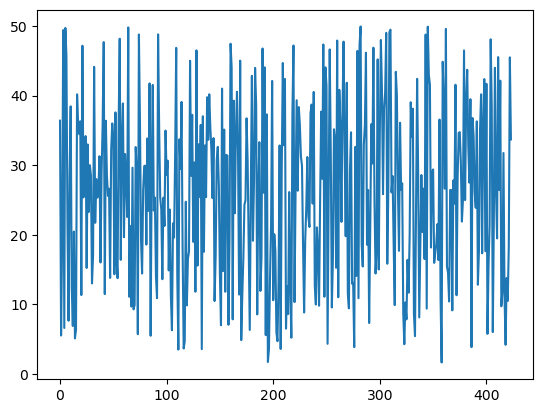

In [35]:
df['Charging Rate (kW)'].plot()

In [36]:
def remove_outliers_iqr(df, col='Charging Rate (kW)', group='Charger Type'):
    def iqr_filter(group_df):
        Q1 = group_df[col].quantile(0.25)
        Q3 = group_df[col].quantile(0.75)
        IQR = Q3 - Q1
        return group_df[(group_df[col] >= Q1 - 1.5 * IQR) & (group_df[col] <= Q3 + 1.5 * IQR)]

    # Aplica doar pe valorile fără ca gruparea să fie adăugată ca și coloană
    return df.groupby(group, group_keys=False).apply(lambda g: iqr_filter(g))


df_clean = remove_outliers_iqr(df)


KeyError: 'Charger Type'

<Axes: xlabel='Charger Type', ylabel='Charging Rate (kW)'>

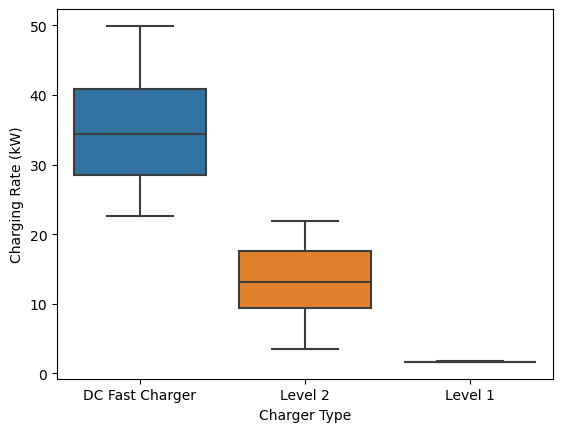

In [42]:
import seaborn as sns
sns.boxplot(x='Charger Type', y='Charging Rate (kW)', data=df)


In [43]:
valid_ranges = {
    "Level 1": (0.5, 2),
    "Level 2": (3, 22),
    "DC Fast Charger": (22, 350)
}

def is_valid(row):
    charger_type = row['Charger Type']
    rate = row['Charging Rate (kW)']
    min_val, max_val = valid_ranges.get(charger_type, (0, float('inf')))
    return min_val <= rate <= max_val

df_clean = df[df.apply(is_valid, axis=1)]


In [44]:
df_clean.shape


(424, 35)

In [45]:
df["Charging Duration (hours)"] = df["Energy Consumed (kWh)"] / df["Charging Rate (kW)"]
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=["Charging Duration (hours)"], inplace=True)


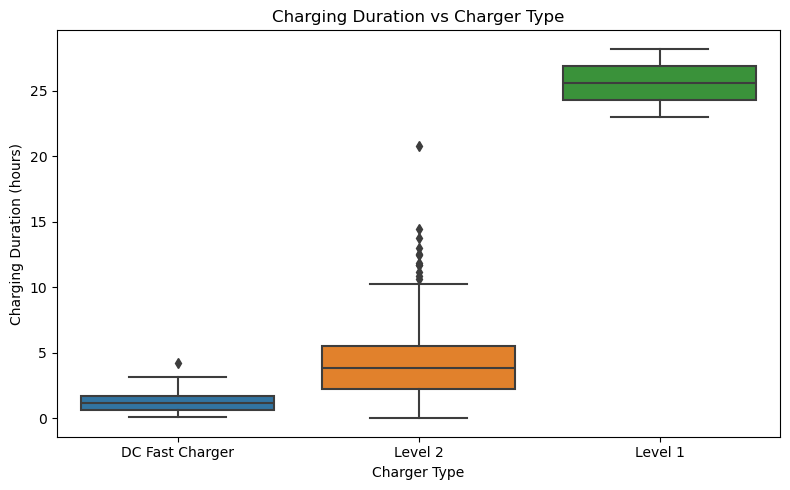

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_charger_type(row):
    if row["Charger Type_Level 1"] == 1.0:
        return "Level 1"
    elif row["Charger Type_Level 2"] == 1.0:
        return "Level 2"
    elif row["Charger Type_DC Fast Charger"] == 1.0:
        return "DC Fast Charger"
    else:
        return "Unknown"

df["Charger Type"] = df.apply(get_charger_type, axis=1)

plt.figure(figsize=(8, 5))
sns.boxplot(x="Charger Type", y="Charging Duration (hours)", data=df)
plt.title("Charging Duration vs Charger Type")
plt.ylabel("Charging Duration (hours)")
plt.xlabel("Charger Type")
plt.tight_layout()
plt.show()

C:\Users\adelg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adelg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adelg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


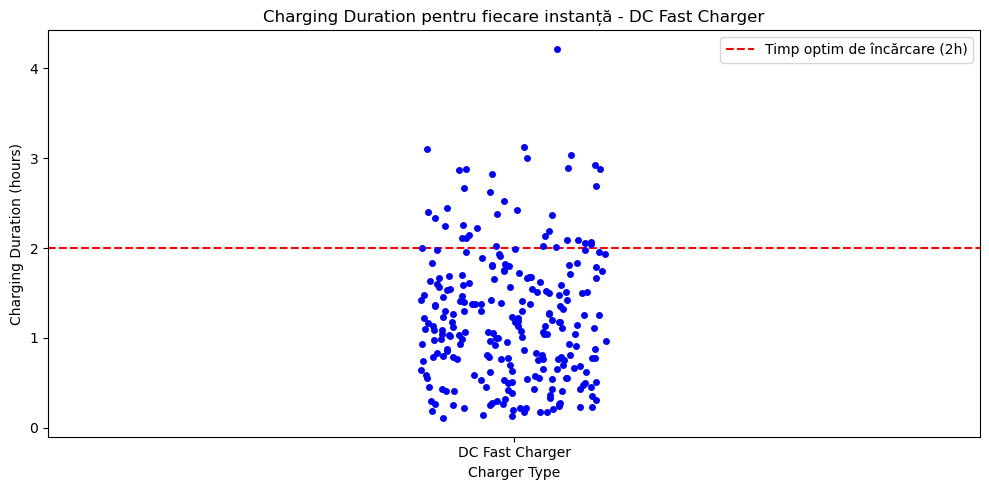

In [48]:
# Filtrare doar instanțele pentru DC Fast Charger
df_dc = df[df["Charger Type"] == "DC Fast Charger"]

# Grafic cu valorile individuale ale Charging Duration
plt.figure(figsize=(10, 5))
sns.stripplot(data=df_dc, x="Charger Type", y="Charging Duration (hours)", color="blue", jitter=True)

# Linie de referință la 2h (val maxim recomandat pentru DC Fast în contextul tău)
plt.axhline(y=2, color='red', linestyle='--', label="Timp optim de încărcare (2h)")

plt.title("Charging Duration pentru fiecare instanță - DC Fast Charger")
plt.ylabel("Charging Duration (hours)")
plt.xlabel("Charger Type")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\adelg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adelg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\adelg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\adelg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

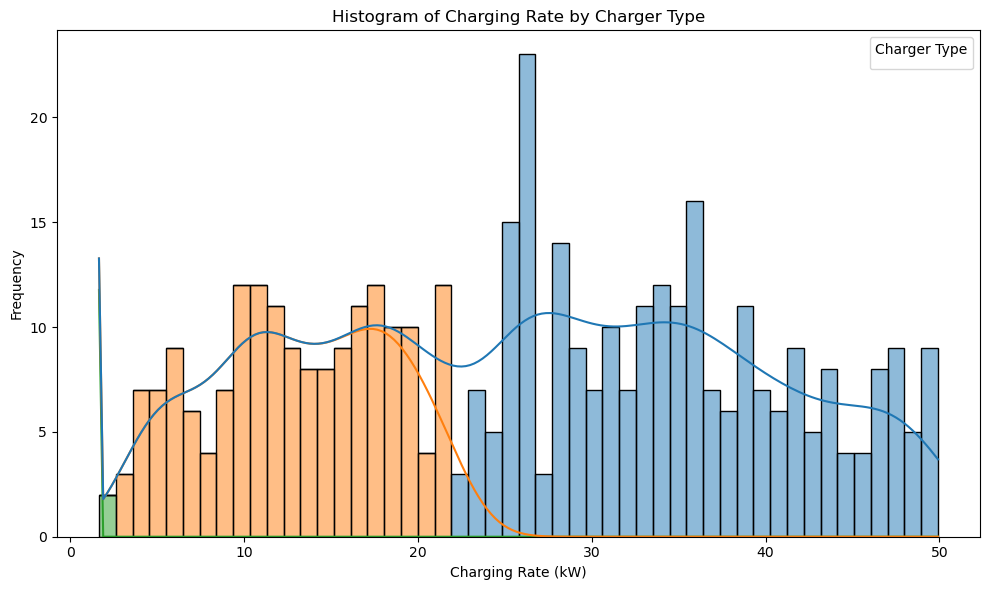

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asigură-te că 'df' conține coloanele 'Charging Rate (kW)' și 'Charger Type'

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Charging Rate (kW)', hue='Charger Type', bins=50, kde=True, multiple='stack')

plt.title('Histogram of Charging Rate by Charger Type')
plt.xlabel('Charging Rate (kW)')
plt.ylabel('Frequency')
plt.legend(title='Charger Type')
plt.tight_layout()
plt.show()


In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Selectează caracteristicile și ținta

charger_type_dummies = pd.get_dummies(df["Charger Type"], prefix="Charger Type").astype(float)

cols_to_drop = [col for col in df.columns if col.startswith("Charger Type_")]
df = df.drop(columns=cols_to_drop)
df = df.drop(columns=["Charger Type"])


df = pd.concat([df, charger_type_dummies], axis=1)
print(df.head())
feature_cols = [col for col in df.columns if col != "Charging Duration (hours)"]
X = df[feature_cols]
y = df["Charging Duration (hours)"]
# Împarte în train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Antrenează modelul
model = RandomForestRegressor(max_depth=30, max_features='sqrt', random_state=40)
model.fit(X_train, y_train)

# Prezice pe test
y_pred = model.predict(X_test)

# Evaluează performanța
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f}")

   Battery Capacity (kWh)  Energy Consumed (kWh)  Charging Duration (hours)  \
0              108.463007              60.712346                   1.668418   
1              100.000000              34.256453                   6.201735   
2               75.000000              16.561064                   0.837725   
3               97.681812              24.726938                   0.500518   
4               50.000000              23.824040                   3.601910   

   Charging Rate (kW)  Charging Cost (USD)  Time of Day  Day of Week  \
0           36.389181            13.087717          2.0          1.0   
1            5.523689            10.972136          1.0          0.0   
2           19.769099            37.441857          0.0          4.0   
3           49.402739            17.494808          2.0          3.0   
4            6.614280             6.430589          2.0          4.0   

   State of Charge (Start %)  State of Charge (End %)  \
0                  29.371576       

In [76]:
import pandas as pd
import os
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def train_rf_model(df):
    # Încarcă datasetul
    
    X = df.drop(columns=[
    'Charging Duration (hours)'#
    # "Charging Station Location_Chicago",
    # "Charging Station Location_Houston",
    # "Charging Station Location_Los Angeles",
    # "Charging Station Location_New York",
    # "Charging Station Location_San Francisco",
    ])
    y = df['Charging Duration (hours)']


    # Împărțim datele în seturi de antrenament și test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Creează și antrenează modelul
    ################ Grid Search
    # rf = RandomForestRegressor( #### acesti hiperparametri gasiti cu grid search {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
    # max_depth=20,
    # max_features='sqrt',
    # min_samples_leaf=1,
    # min_samples_split=10,
    # n_estimators=50,
    # random_state=40
    # )

    ############ Algoritm Genetic
    rf = RandomForestRegressor(  max_depth=30,
    max_features='sqrt',    
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=40)
   
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    

    # Evaluează performanța
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = max(0, r2) * 100  
    
    from sklearn.model_selection import cross_val_score

    scores = cross_val_score(RandomForestRegressor( n_estimators=50,         # Reduce numărul de arbori
    max_depth=10,            # Limitează adâncimea arborilor
    min_samples_split=10,    # Crește numărul minim de mostre per split
    random_state=42), X, y, cv=5, scoring="r2")
    correlation = df.corr(numeric_only=True)['Charging Duration (hours)'].sort_values(ascending=False)
    # print(correlation)
    print(df.groupby(df.filter(like='Charger Type').columns.tolist())['Charging Rate (kW)'].max())
    print(f"Cross-validation R² scores: {scores}")
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R-squared: {r2:.4f}')
    print(f'Accuracy: {accuracy:.2f}%')

    return rf, X.columns

# Exemplu de apel:
#results = train_rf_model("ev_charging_patterns_data_encoded.csv")
df_sintetic=pd.read_csv("ev_charging_synthetic_data.csv")
results = train_rf_model(df)
# Antrenare model
# df_sintetic = pd.read_csv("ev_charging_synthetic_data.csv")
# model, features = train_rf_model(df_sintetic)

# Salvează modelul și coloanele de intrare
joblib.dump(model, "modele/rf_charging_duration_model.pkl")
joblib.dump(features, "modele/input_features_charging duration.pkl")

print("✅ Modelul a fost salvat în 'random_forest_model.pkl'")
print("✅ Coloanele de input au fost salvate în 'input_features.pkl'")

print(results)


Charger Type_DC Fast Charger  Charger Type_Level 1  Charger Type_Level 2
0                             0                     1                         7.169275
                              1                     0                         1.895886
1                             0                     0                       149.639829
Name: Charging Rate (kW), dtype: float64
Cross-validation R² scores: [0.99273004 0.99355498 0.99309004 0.99047297 0.99017889]
Mean Squared Error: 0.2911
R-squared: 0.9852
Accuracy: 98.52%
✅ Modelul a fost salvat în 'random_forest_model.pkl'
✅ Coloanele de input au fost salvate în 'input_features.pkl'
(RandomForestRegressor(max_depth=30, max_features='sqrt', random_state=40), Index(['Battery Capacity (kWh)', 'Energy Consumed (kWh)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicl

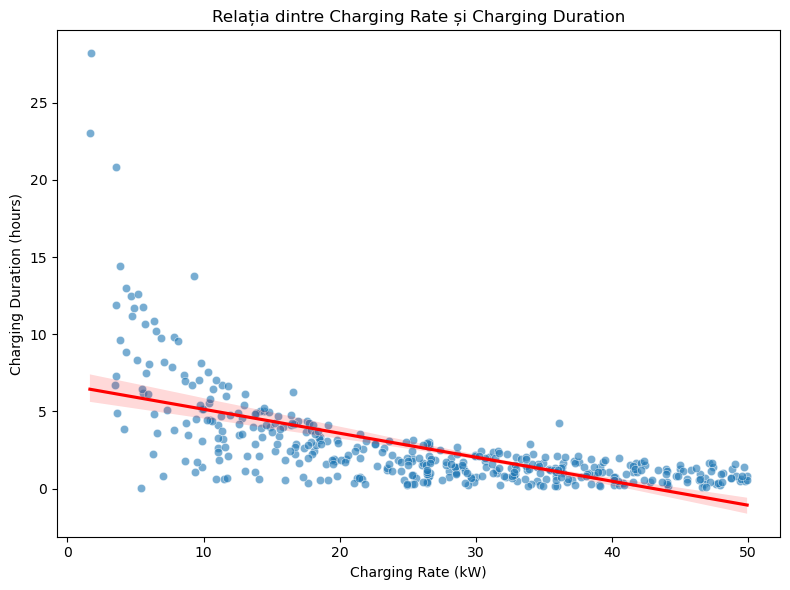

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Charging Rate (kW)", y="Charging Duration (hours)", alpha=0.6)
sns.regplot(data=df, x="Charging Rate (kW)", y="Charging Duration (hours)", scatter=False, color='red')

plt.title("Relația dintre Charging Rate și Charging Duration")
plt.xlabel("Charging Rate (kW)")
plt.ylabel("Charging Duration (hours)")
plt.tight_layout()
plt.show()


(500, 28)
R^2 test score: 0.9891
MSE test score: 0.2150


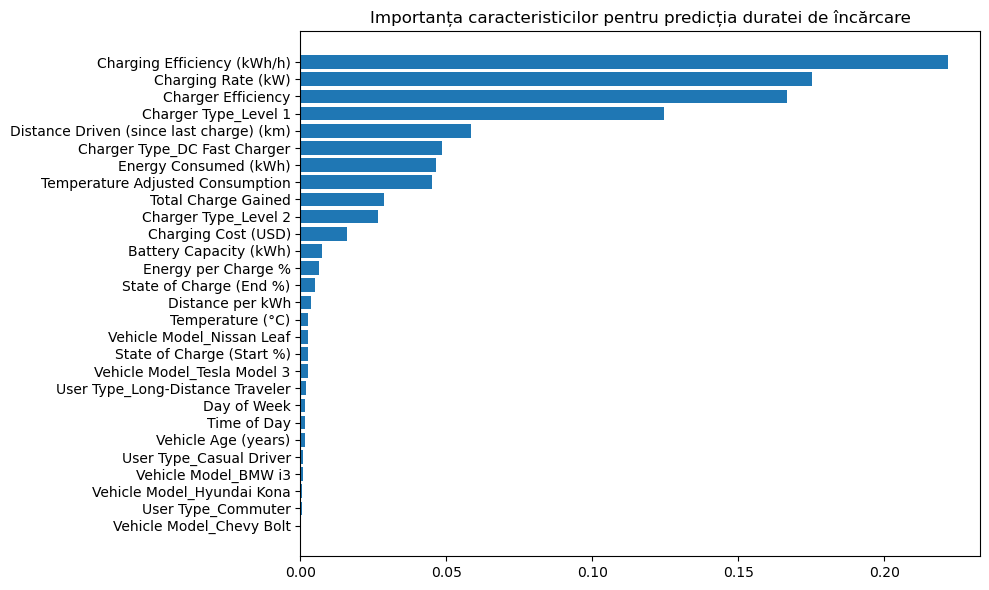

Model salvat cu succes în 'random_forest_ev_charging_model.joblib'
Predicted Charging Duration: 35.2 minutes


In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 
# --- 1. Încarcă datele ---
df = pd.read_csv("ev_charging_synthetic_data.csv")


# Adaugă și celelalte feature-uri derivate necesare (reutilizând logica ta):
def add_features(df):
    soc_diff = df['State of Charge (End %)'] - df['State of Charge (Start %)']
    df['Charging Efficiency (kWh/h)'] = df['Energy Consumed (kWh)'] / df['Charging Rate (kW)'].replace(0, np.nan)
    df['Energy per Charge %'] = df['Energy Consumed (kWh)'] / soc_diff.replace(0, np.nan)
    df['Distance per kWh'] = df['Distance Driven (since last charge) (km)'] / df['Energy Consumed (kWh)'].replace(0, np.nan)
    df['Total Charge Gained'] = soc_diff
    df['Charger Efficiency'] = df['Charging Rate (kW)'] / soc_diff.replace(0, np.nan)
    avg_temp_ref = 20
    df['Temperature Adjusted Consumption'] = df['Energy Consumed (kWh)'] * (1 + abs(df['Temperature (°C)'] - avg_temp_ref) / avg_temp_ref)
    df.fillna(0, inplace=True)
    return df

df = add_features(df)

# --- 3. Pregătește datele pentru model ---
X = df.drop(columns=['Charging Duration (hours)',
    "Charging Station Location_Chicago",
    "Charging Station Location_Houston",
    "Charging Station Location_Los Angeles",
    "Charging Station Location_New York",
    "Charging Station Location_San Francisco",
    #"Charging Cost (USD)"
                    ])
print(X.shape)
y = df['Charging Duration (hours)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Antrenează modelul ---
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=40
)

model.fit(X_train, y_train)

# --- 5. Evaluează performanța ---
y_pred = model.predict(X_test)
print(f"R^2 test score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE test score: {mean_squared_error(y_test, y_pred):.4f}")
importances = model.feature_importances_

features_df = pd.DataFrame({
    "Feature": model.feature_names_in_,
    "Importance": model.feature_importances_
})

features_df = features_df.sort_values("Importance", ascending=False)

# Afișare grafică
plt.figure(figsize=(10, 6))
plt.barh(features_df["Feature"], features_df["Importance"])
plt.title("Importanța caracteristicilor pentru predicția duratei de încărcare")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
joblib.dump(model, 'modele/rf_charging_duration_model.joblib')
print("Model salvat cu succes în 'random_forest_ev_charging_model.joblib'")

# --- 6. Pregătește un input de test (conform coloanelor din X) ---
def compute_derived_features(input_data):
    energy = input_data["Energy Consumed (kWh)"]
    rate = input_data["Charging Rate (kW)"]
    soc_start = input_data["State of Charge (Start %)"]
    soc_end = input_data["State of Charge (End %)"]
    dist = input_data["Distance Driven (since last charge) (km)"]
    temp = input_data["Temperature (°C)"]

    charge_diff = soc_end - soc_start if (soc_end - soc_start) != 0 else 1e-6  # evită divizare la zero

    derived = {
        "Charging Efficiency (kWh/h)": energy / rate if rate != 0 else 0,
        "Energy per Charge %": energy / charge_diff,
        "Distance per kWh": dist / energy if energy != 0 else 0,
        "Total Charge Gained": charge_diff,
        "Charger Efficiency": rate / charge_diff,
        "Temperature Adjusted Consumption": energy * (1 + abs(temp - 20)/20)
    }
    input_data_updated = input_data.copy()
    input_data_updated.update(derived)
    return input_data_updated

# Exemplu folosire:

test_input_basic = {
    "Battery Capacity (kWh)": 57.0,
    "Energy Consumed (kWh)": 26,
    "Charging Rate (kW)": 34,   # atenție: trebuie să fie corect raportat cu celelalte valori!
    "Charging Cost (USD)": 6.43,
    "Time of Day": 14,
    "Day of Week": 3,
    "State of Charge (Start %)": 20,
    "State of Charge (End %)": 80,
    "Distance Driven (since last charge) (km)": 13.0,
    "Temperature (°C)": 18.0,
    
    "Vehicle Age (years)": 5,
    
    "Vehicle Model_BMW i3": 0,
    "Vehicle Model_Chevy Bolt": 0,
    "Vehicle Model_Hyundai Kona": 0,
    "Vehicle Model_Nissan Leaf": 0,
    "Vehicle Model_Tesla Model 3": 1,
        
    "User Type_Casual Driver": 1,
    "User Type_Commuter": 0,
    "User Type_Long-Distance Traveler": 0,
    
    "Charger Type_DC Fast Charger": 1,
    "Charger Type_Level 1": 0,
    "Charger Type_Level 2": 0,
}

test_input_full = compute_derived_features(test_input_basic)

# --- 7. Transformă inputul în DataFrame în ordinea corectă ---
input_df = pd.DataFrame([test_input_full])
input_df = input_df.reindex(columns=X.columns, fill_value=0)

# --- 8. Prezice durata ---
predicted_duration = model.predict(input_df)[0]
if predicted_duration < 1:
    minutes = predicted_duration * 60
    print(f"Predicted Charging Duration: {minutes:.1f} minutes")
else:
    print(f"Predicted Charging Duration: {predicted_duration:.2f} hours")
# R^2 test score: 0.9852
# MSE test score: 0.2911
# Model salvat cu succes în 'random_forest_ev_charging_model.joblib'
# Predicted Charging Duration: 20.5 minutes


In [8]:
df.columns


Index(['Battery Capacity (kWh)', 'Energy Consumed (kWh)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Vehicle Model_BMW i3',
       'Vehicle Model_Chevy Bolt', 'Vehicle Model_Hyundai Kona',
       'Vehicle Model_Nissan Leaf', 'Vehicle Model_Tesla Model 3',
       'Charging Station Location_Chicago',
       'Charging Station Location_Houston',
       'Charging Station Location_Los Angeles',
       'Charging Station Location_New York',
       'Charging Station Location_San Francisco', 'User Type_Casual Driver',
       'User Type_Commuter', 'User Type_Long-Distance Traveler',
       'Charging Efficiency (kWh/h)', 'Energy per Charge %',
       'Distance per kWh', 'Total Charge Gained', 'Charger Efficiency',
       'Temperature Adjusted Consumption', 'Charger Type_DC Fast Charger',
       'C

In [10]:
import pandas as pd
data=df
# Grupare după coloanele one-hot cu 'Charging Station Location'
group_cols = data.filter(like='Charging Station Location').columns.tolist()

# Transformăm în "label" efectiv locația (din one-hot în denumire simplă)
data['Vehicle Model'] = data[group_cols].idxmax(axis=1).str.replace('Vehicle Model_', '')

# Grupăm și calculăm media costului
data = data.groupby('Vehicle Model')['Charging Cost (USD)'].min().reset_index()

# Afișăm ca tabel
print(data.to_string(index=False))


TypeError: '>' not supported between instances of 'str' and 'int'

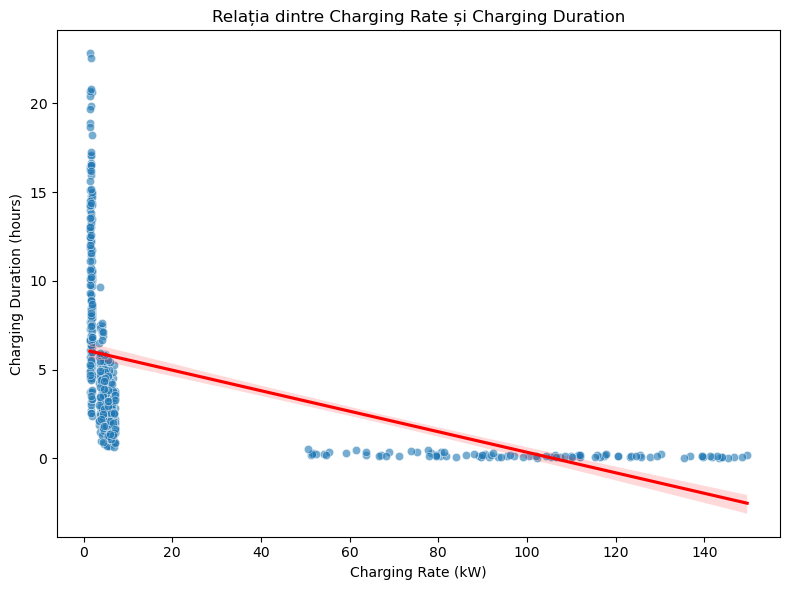

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Charging Rate (kW)", y="Charging Duration (hours)", alpha=0.6)
sns.regplot(data=df, x="Charging Rate (kW)", y="Charging Duration (hours)", scatter=False, color='red')

plt.title("Relația dintre Charging Rate și Charging Duration")
plt.xlabel("Charging Rate (kW)")
plt.ylabel("Charging Duration (hours)")
plt.tight_layout()
plt.show()


In [71]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Încarcă datele ---
df = pd.read_csv("ev_charging_synthetic_data.csv")

# --- 2. Feature engineering ---
def add_features(df):
    soc_diff = df['State of Charge (End %)'] - df['State of Charge (Start %)']
    df['Charging Efficiency (kWh/h)'] = df['Energy Consumed (kWh)'] / df['Charging Rate (kW)'].replace(0, np.nan)
    df['Energy per Charge %'] = df['Energy Consumed (kWh)'] / soc_diff.replace(0, np.nan)
    df['Distance per kWh'] = df['Distance Driven (since last charge) (km)'] / df['Energy Consumed (kWh)'].replace(0, np.nan)
    df['Total Charge Gained'] = soc_diff
    df['Charger Efficiency'] = df['Charging Rate (kW)'] / soc_diff.replace(0, np.nan)
    avg_temp_ref = 20
    df['Temperature Adjusted Consumption'] = df['Energy Consumed (kWh)'] * (1 + abs(df['Temperature (°C)'] - avg_temp_ref) / avg_temp_ref)
    df.fillna(0, inplace=True)
    return df

df = add_features(df)

# --- 3. Columne de exclus ---
drop_location_cols = [
    "Charging Station Location_Chicago",
    "Charging Station Location_Houston",
    "Charging Station Location_Los Angeles",
    "Charging Station Location_New York",
    "Charging Station Location_San Francisco",
]

# --- 4. Seturi cu și fără Charging Cost ---
X_with_cost = df.drop(columns=['Charging Duration (hours)'] + drop_location_cols)
X_without_cost = X_with_cost.drop(columns=["Charging Cost (USD)"])
y = df['Charging Duration (hours)']

# --- 5. Funcție de antrenare și evaluare ---
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(
        n_estimators=100,
        max_depth=30,
        max_features='sqrt',
        min_samples_leaf=1,
        min_samples_split=2,
        random_state=40
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return r2, mse

# --- 6. Rulăm ambele variante ---
r2_with, mse_with = train_and_evaluate(X_with_cost, y)
r2_without, mse_without = train_and_evaluate(X_without_cost, y)

# --- 7. Afișare rezultate ---
print(f"✅ Model CU 'Charging Cost (USD)':")
print(f"   R²:  {r2_with:.4f}")
print(f"   MSE: {mse_with:.4f}")

print(f"\n✅ Model FĂRĂ 'Charging Cost (USD)':")
print(f"   R²:  {r2_without:.4f}")
print(f"   MSE: {mse_without:.4f}")


✅ Model CU 'Charging Cost (USD)':
   R²:  0.9891
   MSE: 0.2150

✅ Model FĂRĂ 'Charging Cost (USD)':
   R²:  0.9879
   MSE: 0.2383
